In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import VotingClassifier
from sklearn.impute import SimpleImputer

In [13]:
df = pd.read_csv("C:\\Users\\hp\\Desktop\\advertising_ef.csv")


In [15]:
print('Info')
df.info()
print('Head')
df.head()

Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1005 non-null   float64
 1   Age                       998 non-null    float64
 2   Area Income               998 non-null    float64
 3   Daily Internet Usage      1005 non-null   float64
 4   City                      998 non-null    object 
 5   Gender                    1009 non-null   object 
 6   Country                   996 non-null    object 
 7   Clicked on Ad             1009 non-null   int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 63.2+ KB
Head


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,City,Gender,Country,Clicked on Ad
0,68.95,35.0,61833.90,256.09,Wrightburgh,Female,Tunisia,0
1,NaN,31.0,68441.85,193.77,West Jodi,Male,Nauru,0
2,69.47,26.0,59785.94,236.50,Davidton,Female,San Marino,0
3,74.15,29.0,54806.18,245.89,West Terrifurt,Male,Italy,0
4,68.37,35.0,73889.99,225.58,South Manuel,Female,Iceland,0


In [17]:
X = df.drop("Clicked on Ad", axis=1)
y = df["Clicked on Ad"]
#Visualize Data Before Preprocessing
categorical_cols = X.select_dtypes(include=['object']).columns  # City, Gender, Country
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns  # Daily Time Spent, Age, etc.

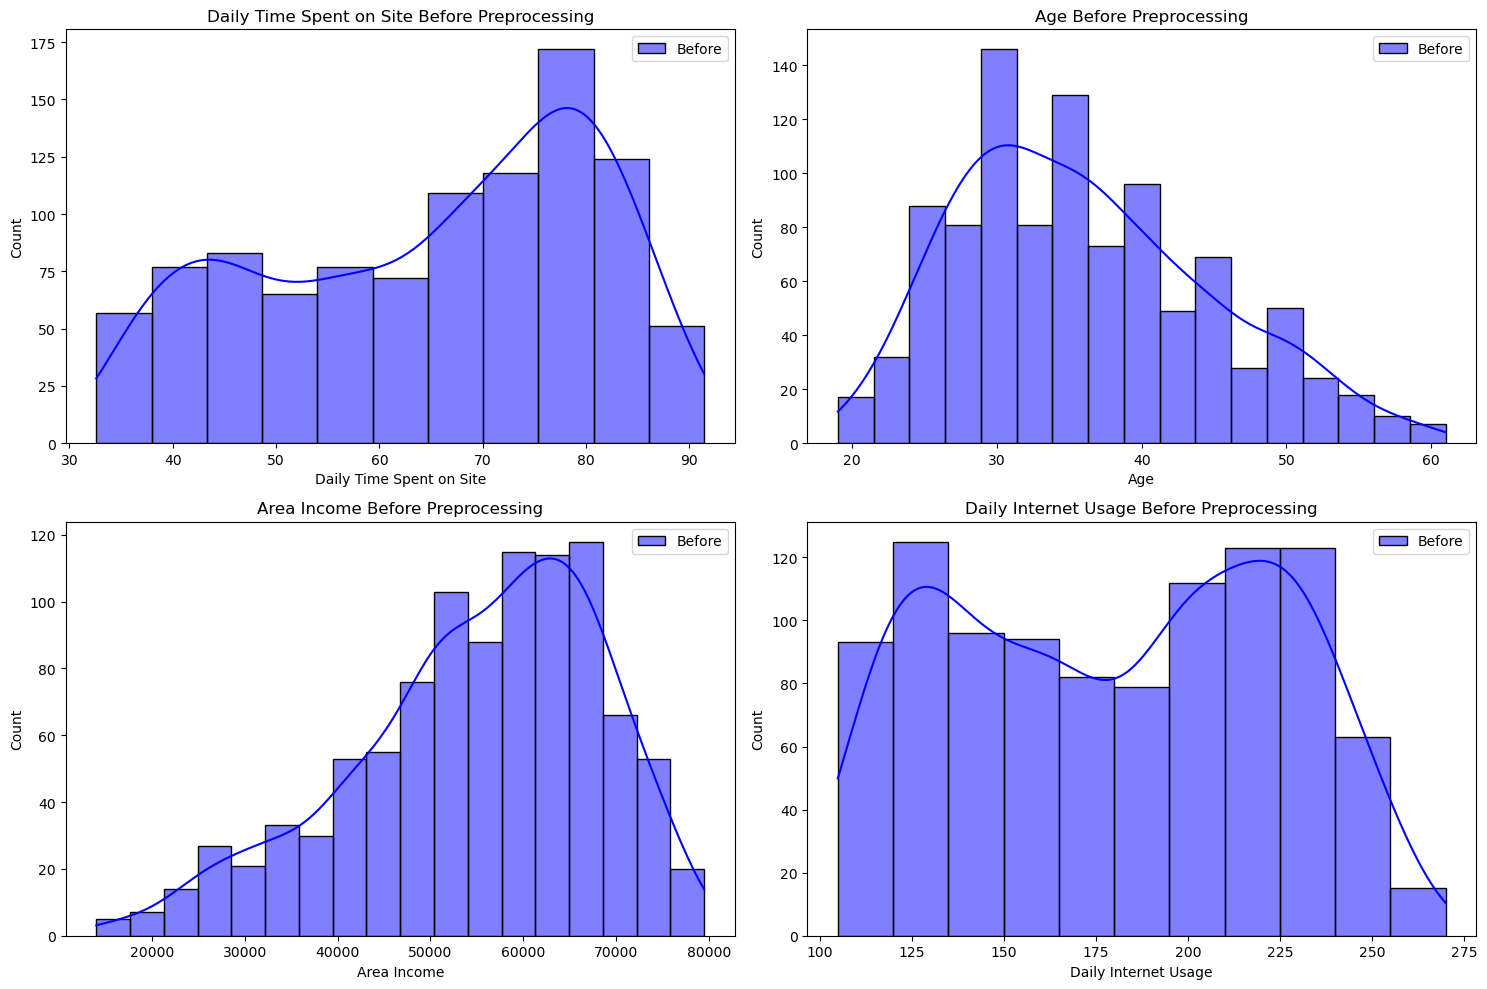

In [19]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(X[col], kde=True, color='blue', label='Before')
    plt.title(f'{col} Before Preprocessing')
    plt.legend()
plt.tight_layout()
plt.show()

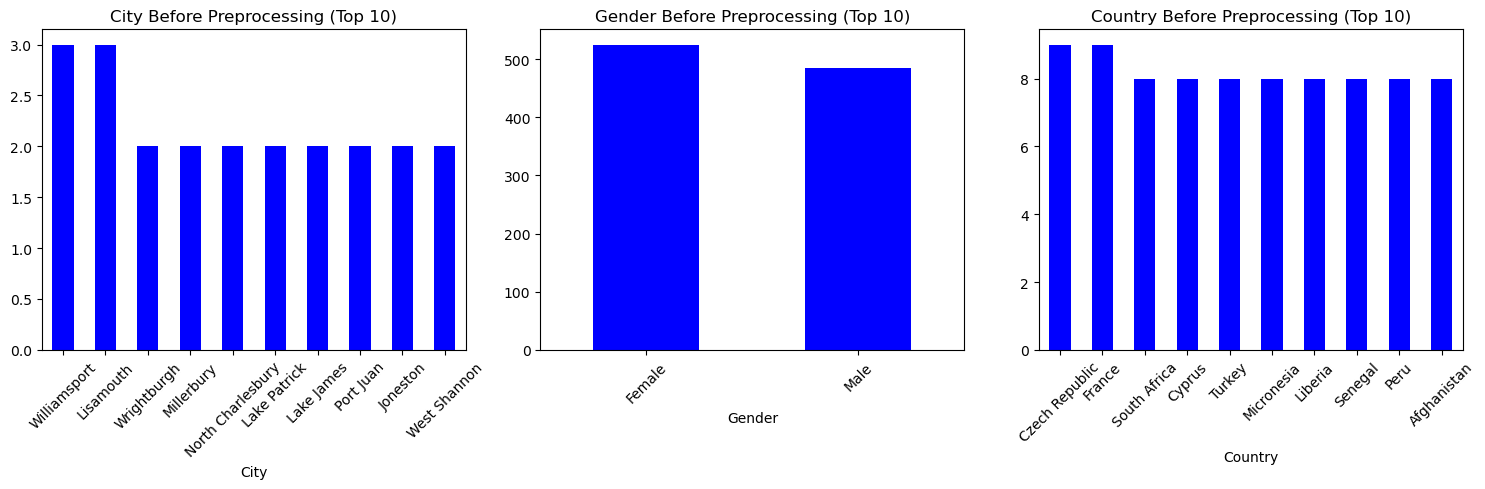

In [20]:

plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, 3, i)
    X[col].value_counts().nlargest(10).plot(kind='bar', color='blue')
    plt.title(f'{col} Before Preprocessing (Top 10)')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
# Encode categorical variables (Gender, City, Country)
le = LabelEncoder()
df['City'] = le.fit_transform(df['City'])
df['Country'] = le.fit_transform(df['Country'])
df['Gender'] = le.fit_transform(df['Gender'])

# Separate features and target variable
X = df.drop(columns=["Clicked on Ad"])
y = df["Clicked on Ad"]

# Separate numerical and categorical features
numerical_features = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']
categorical_features = ['City', 'Country', 'Gender']


X_numerical = X[numerical_features]
X_categorical = X[categorical_features]

In [25]:
# Separate features and target variable
X = df.drop(columns=["Clicked on Ad"])
y = df["Clicked on Ad"]

# Handle missing values before processing
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Scale only numerical features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)



Gaussian Naive Bayes Accuracy: 0.9537953795379538
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       156
           1       0.96      0.95      0.95       147

    accuracy                           0.95       303
   macro avg       0.95      0.95      0.95       303
weighted avg       0.95      0.95      0.95       303



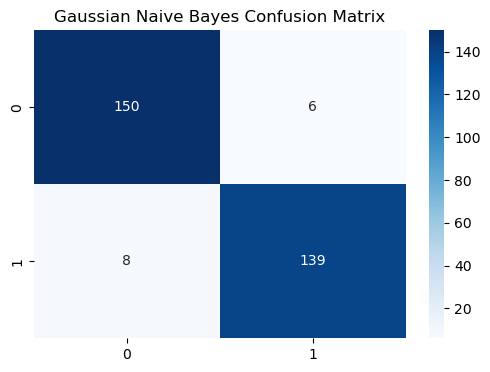

Multinomial Naive Bayes Accuracy: 0.8976897689768977
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       156
           1       0.95      0.84      0.89       147

    accuracy                           0.90       303
   macro avg       0.90      0.90      0.90       303
weighted avg       0.90      0.90      0.90       303



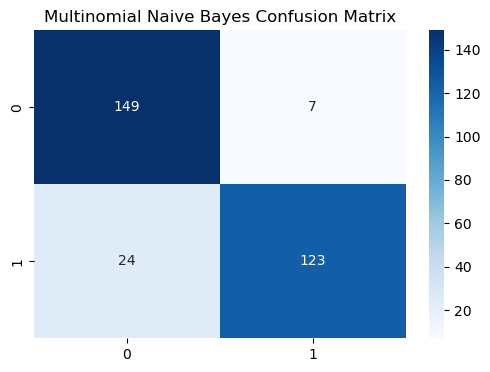

Bernoulli Naive Bayes Accuracy: 0.528052805280528
              precision    recall  f1-score   support

           0       0.54      0.53      0.54       156
           1       0.51      0.52      0.52       147

    accuracy                           0.53       303
   macro avg       0.53      0.53      0.53       303
weighted avg       0.53      0.53      0.53       303



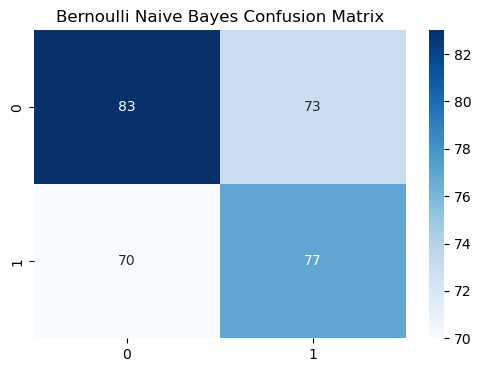

In [27]:
# Train Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

# Train Multinomial Naive Bayes
mnb = MultinomialNB()
mnb.fit(X_train - X_train.min(), y_train)  # Shift values to be non-negative
y_pred_mnb = mnb.predict(X_test - X_train.min())

# Train Bernoulli Naive Bayes
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)

# Evaluate models
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
accuracy_bnb = accuracy_score(y_test, y_pred_bnb)

print("Gaussian Naive Bayes Accuracy:", accuracy_gnb)
print(classification_report(y_test, y_pred_gnb))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_gnb), annot=True, fmt='d', cmap='Blues')
plt.title("Gaussian Naive Bayes Confusion Matrix")
plt.show()

print("Multinomial Naive Bayes Accuracy:", accuracy_mnb)
print(classification_report(y_test, y_pred_mnb))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_mnb), annot=True, fmt='d', cmap='Blues')
plt.title("Multinomial Naive Bayes Confusion Matrix")
plt.show()

print("Bernoulli Naive Bayes Accuracy:", accuracy_bnb)
print(classification_report(y_test, y_pred_bnb))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_bnb), annot=True, fmt='d', cmap='Blues')
plt.title("Bernoulli Naive Bayes Confusion Matrix")
plt.show()